  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="right">
                <font size=25px>
                    <b>PREDICTION OF FRAUDULENT TRANSACTIONS
                    </b>
                </font>
            </div>
        </td>
    </tr>

## **Problem Statement**:
The objective of the dataset is to predict the fraud transaction during the transaction of amount through various type of payment transactions.




## Data Definition:

Input variables:

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction.

**oldbalanceOrg** - initial balance before the transaction.

**newbalanceOrig** - new balance after the transaction.

**nameDest** - customer who is the recipient of the transaction.

**oldbalanceDest** - initial balance recipient before the transaction.

**newbalanceDest** - new balance recipient after the transaction.

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts.



**Contents**

1. **[Import Packages](#import_packages)**


2. **[Read Data](#Read_Data)**


3. **[Understand and Prepare Data](#data_preparation)**
    - 3.1 - **[Data Types and Dimensions](#Data_Understanding)**     
    - 3.2 - **[Statistical Summary]()**
    - 3.3 - **[Correlation]()**
    - 3.4 - **[Checking Duplicates]()**
    - 3.5 - **[Missing Data Treatment]()**
  
  
4. **[Visualization](#Visualization)**


5. **[Checking Outliers](#Visualization)**


6. **[Balancing the Data](#Visualization)**


7. **[Feature Selection](#feature_selection)**
    - 7.1 - **[Logistic Regression](#Logistic_Regression)**
    - 7.2 - **[LOGISTICREGRESSION HYPERPARAMETER TUNING USING GRIDSEARCHCV](#GridSearchCV)**
    - 7.3 - **[Random Forest Classifier](#Random_Forest_Classifier)**
    - 7.4 - **[Decision_Tree_Classifier](#Decision_Tree_Classifier)** 


8. **[Model Comparision](#model_cmp)**


9. **[Power BI Report](#power_bi)**
  

<a id='import_packages'></a>
## **1. Import Packages**

In [189]:
!pip install imblearn

In [190]:
!pip install mysql

In [191]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


<a id='Read_Data'></a>
## **2. Read the Data**

Read the data using read_csv() function from pandas

In [192]:
!pip install mysql-connector-python

In [193]:
import mysql.connector as mysql

In [194]:
db=mysql.connect(host="localhost",user="root",password="Raghu@123",database="Capstone", auth_plugin='mysql_native_password')

In [195]:
print(db)

In [196]:
myc=db.cursor()
myc=db.cursor(buffered=True, dictionary=True)

In [197]:
myc.execute('SELECT * FROM capstone.`fraud(1)`')

In [198]:
df=pd.DataFrame(myc.fetchall())

In [199]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22551,8,TRANSFER,1911412.45,C402436442,0.0,0.00,C787033725,2122990.49,4547905.63,0,0
22552,8,CASH_OUT,188622.04,C337225832,1048.0,0.00,C1141049797,24453.56,1404288.87,0,0
22553,8,PAYMENT,8492.12,C399201261,957726.0,949233.88,M103011325,0.00,0.00,0,0
22554,8,CASH_OUT,304273.00,C1948763138,21322.0,0.00,C644345897,51153.10,800992.18,0,0


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. 

Here we will analyze and prepare data:

                        3.1. Check dimensions and data types of the dataframe 
                        3.2. Study summary statistic
                        3.3. Correlation
                        3.4. Checking Duplicates
                        3.5. Missing Data Treatment              
                
            
        


<a id='Data_Types'></a>
**3.1 Data Types and Dimensions**

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            22556 non-null  int64  
 1   type            22556 non-null  object 
 2   amount          22556 non-null  float64
 3   nameOrig        22556 non-null  object 
 4   oldbalanceOrg   22556 non-null  float64
 5   newbalanceOrig  22556 non-null  float64
 6   nameDest        22556 non-null  object 
 7   oldbalanceDest  22556 non-null  float64
 8   newbalanceDest  22556 non-null  float64
 9   isFraud         22556 non-null  int64  
 10  isFlaggedFraud  22556 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.9+ MB


**From the above output, we see that** 

                        1. type,nameOrig and nameDest are in the form of object
                        2. isFraud is our class label

In [201]:
#Getting the Shape of the Dataset
print(df.shape)


(22556, 11)


**We see the dataframe has 11 columns and 22556 observations**

In [202]:
#Name of the columns present in the given Dataset
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [203]:
#Datatypes of the data present in the given Dataset
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<a id='Statistical_Summary'></a>
**3.2 Statistical Summary**

Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [204]:
df.describe(include='all')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,22556.000000,22556,2.255600e+04,22556,2.255600e+04,2.255600e+04,22556,2.255600e+04,2.255600e+04,22556.000000,22556.0
unique,NaN,5,NaN,22556,NaN,NaN,14171,NaN,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1231006815,NaN,NaN,C985934102,NaN,NaN,NaN,NaN
freq,NaN,11476,NaN,1,NaN,NaN,69,NaN,NaN,NaN,NaN
mean,6.128569,NaN,1.300674e+05,NaN,8.664143e+05,8.847790e+05,NaN,8.308427e+05,1.188440e+06,0.003591,0.0
std,2.423753,NaN,2.988948e+05,NaN,2.294567e+06,2.338020e+06,NaN,2.497704e+06,3.146684e+06,0.059819,0.0
min,1.000000,NaN,2.390000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,NaN,5.581483e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.000000,NaN,1.732210e+04,NaN,2.053200e+04,6.728425e+03,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,NaN,1.497186e+05,NaN,1.561783e+05,1.608425e+05,NaN,3.164266e+05,5.148234e+05,0.000000,0.0


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.

In [205]:
# data frame with categorical features
df.describe(include='object')

,type,nameOrig,nameDest
count,22556,22556,22556
unique,5,22556,14171
top,PAYMENT,C1231006815,C985934102
freq,11476,1,69


The above output illustrates the summary statistics of the categorical variables i.e type,nameOrig and nameDest(no.of levels in the variable), top(majority level) and the count of the majority level.

<a id='Statistical_Summary'></a>
**3.3 Correlation**

Here we take a look at the Correlation of each attribute. 

Call the corr() function which will return the correlation matrix of numeric variables.

In [206]:
# check correlation
corr=df.corr()

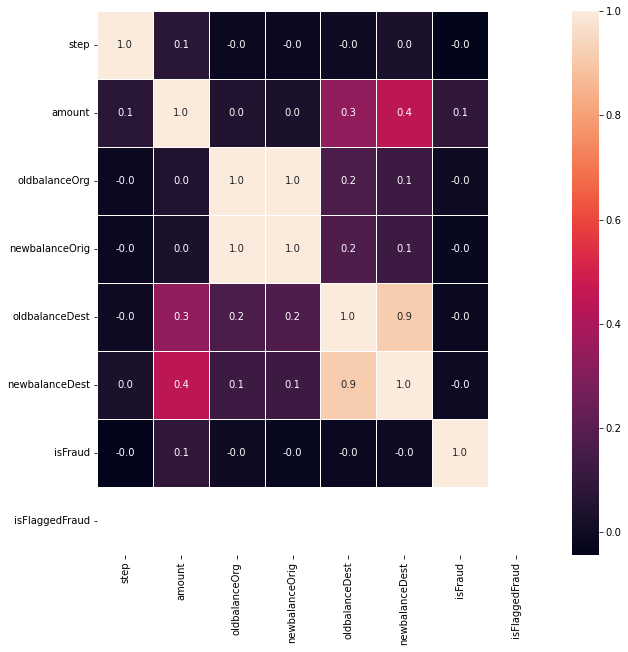

In [207]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

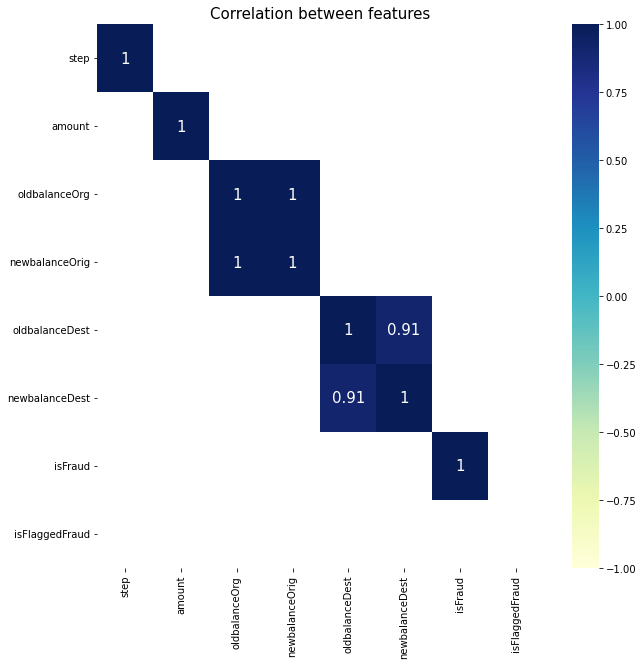

In [208]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(10, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

<a id='Checking Duplicates'></a>
 **3.4. Checking Duplicates**

Checking the given dataset wheather it contains Duplicated values or not.


In [209]:
df.duplicated().sum()

0

The above output illustrates that the given dataset doesn't contain any duplicate values.

<a id='Missing_Data_Treatment'></a>
**3.5. Missing Data Treatment**

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

In order to get the count of missing values in each column, we use the in-built function .isna().sum()

In [210]:
# checking for missing values

df.isna().sum().sort_values(ascending=False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The above output illustrates that the given dataset doesn't contain any missing values.

<a id='Visualization'></a>
## 4. Visualization


<AxesSubplot:xlabel='type', ylabel='count'>

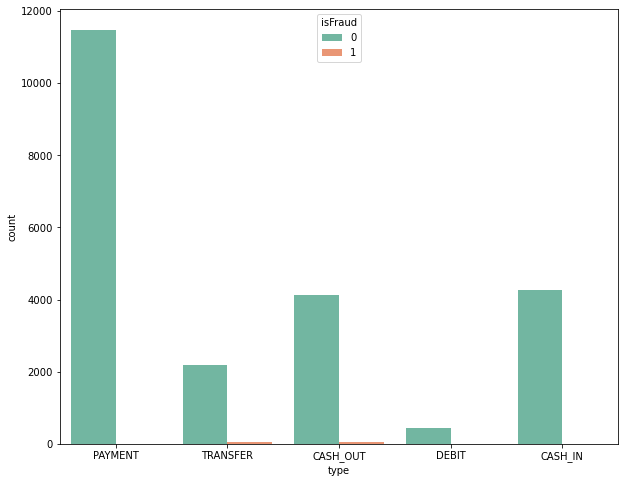

In [211]:
# counting the number of transactions per type
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2")

From the above results, we get the type of the transactions that taken place.

<AxesSubplot:xlabel='amount', ylabel='Density'>

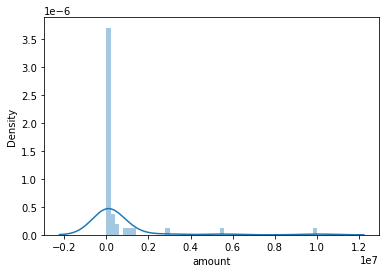

In [212]:
#displot---- distplot represents the univariate distribution of data 
positive_case = df[df['isFraud']==1]
sns.distplot(positive_case['amount'])

From the above results, we conclude the data distribution of a variable against the density distribution.

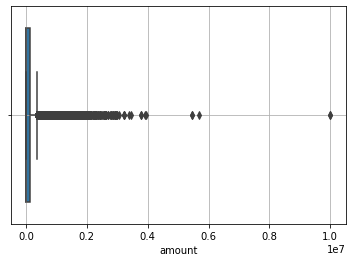

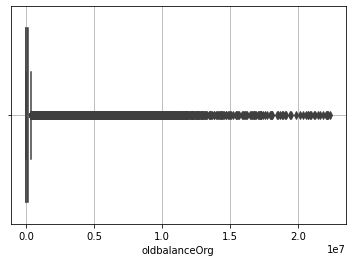

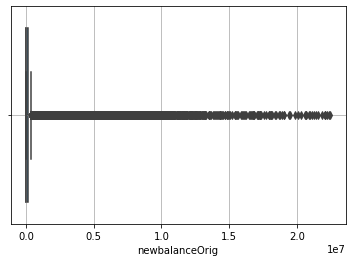

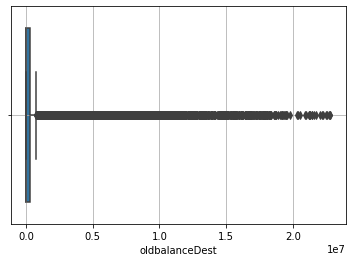

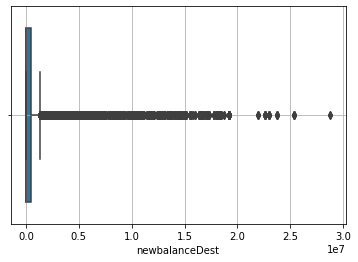

In [213]:
#Boxplot
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

From the above results, we conclude the boxplots of the columns that are fed by us.

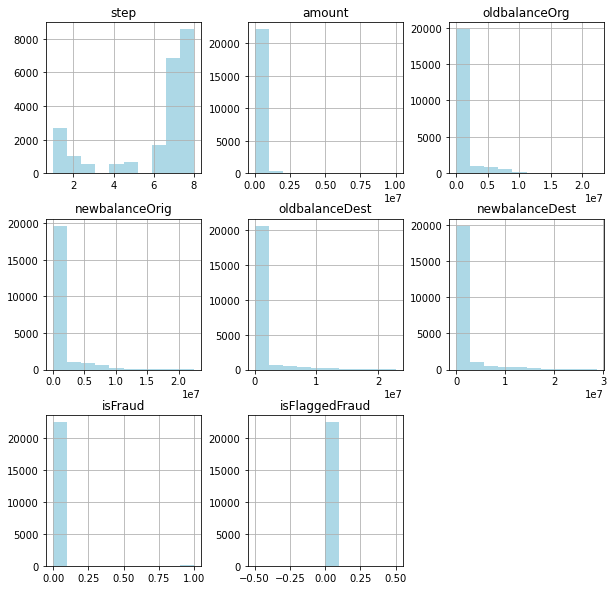

In [214]:
#Histogram
import matplotlib.pyplot as plt
fig=df.hist(figsize=(10,10),color='lightblue')
plt.show()

From the above results, we conclude the histogram of the given dataset.

<a id='Checking Outliers'></a>
## 5. Checking Outliers


In [215]:
# getting columns
import numpy
cols=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']

Here, we are getting only the required columns for checking the outliers.

In [216]:
# IQR method (Inter Quantile Range Method)

p0=[]
p100=[]
iqr=[]

q1=[]
q2=[]
q3=[]


for i in cols:

  if type(df[i][0]) in [numpy.float64,numpy.int64] :
    
    p0.append(df[i].min())

    p100.append(df[i].max())

    x=df[i].quantile(0.25)                   # 25th quantile

    y= df[i].quantile(0.50)                    # 50th quantile

    z= df[i].quantile(0.75)                    # 75th quantile
    
    q1.append(x)
    q2.append(y)
    q3.append(z)
    
    iqr.append(z-x)                            # Inter Quantile Range
  else:
    p0.append(None)

    p100.append(None)

    iqr.append(None)

    q1.append(None)
    q2.append(None)
    q3.append(None)

For checking the outliers, we are using the **IQR** method.

In [217]:
n=len(cols)
for i in range(0,n):
  print(p0[i],'\t',p100[i],'\t',iqr[i])

2.39 	 10000000.0 	 144137.13999999998
0.0 	 22352310.12 	 156178.32749999998
0.0 	 22465998.18 	 160842.4925
0.0 	 22787471.89 	 316426.6075
0.0 	 28783585.38 	 514823.4


In [218]:
lower_cutoff=[]
upper_cutoff=[]
i=0
for i in range(0,n):
  if (iqr[i]!=None) and (q1[i]!=None) and (q3[i]!=None):
    lower_cutoff.append(q1[i]- 1.5*iqr[i])
    upper_cutoff.append(q3[i]+ 1.5*iqr[i])
  else:
    lower_cutoff.append(None)
    upper_cutoff.append(None)
              

In [219]:
print(lower_cutoff)
print(upper_cutoff)

[-210624.22749999995, -234267.49124999996, -241263.73875, -474639.91125, -772235.1000000001]
[365924.33249999996, 390445.81875, 402106.23124999995, 791066.51875, 1287058.5]


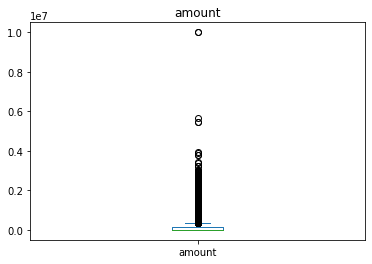

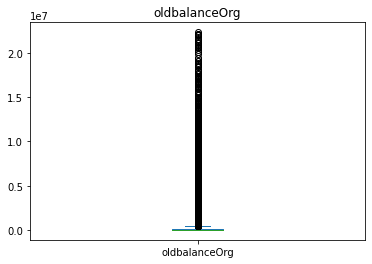

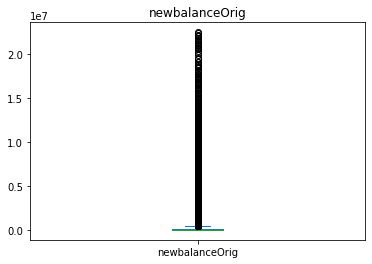

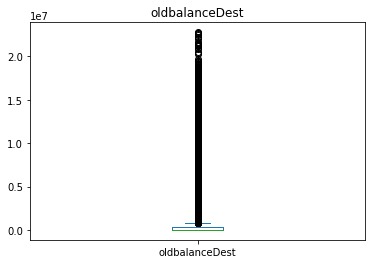

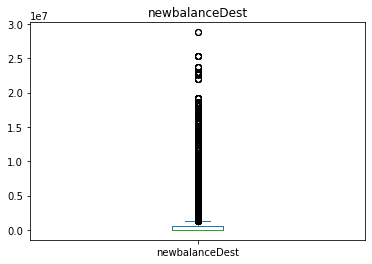

In [220]:
# box plot for the outliers

for i in cols:
  df[i].plot(title=i,kind='box')
  plt.show()

From the above results, we conclude that the **outliers are present**in the given dataset.

But there is **no need to clip the outliers** , because if **we remove the outliers , couldn't able to the fraudulents transactions**. 

<a id="Balancing of Data"> </a>
## 6. Balancing of Data

The Balancing of the given Dataset is an important feature, Her are using the **SMOTE(Synthetic Minority Oversampling Technique)**.

In [221]:
# dropping the nameOrig and nameDest columns as they are of no use

df.drop(["nameOrig" , "nameDest"] , inplace = True , axis =1)

In [222]:
# label encoding of the type feature.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


Here,By using Label_Encoder method, we conclude with the tranformation of the categorical values into numerical values.

SMOTE (Synthetic Minority Oversampling Technique) for balancing data

In [223]:
 #splitting features and the target variable
# consider all the columns except 'target' using 'iloc'
# here id is not required for analysis
df_features = df.iloc[:, df.columns != 'isFraud']
# consider the target variable
df_target = df.iloc[:,df.columns == 'isFraud']

In [224]:
# get counts of 0's and 1's in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.isFraud.value_counts()
class_frequency

0    22475
1       81
Name: isFraud, dtype: int64

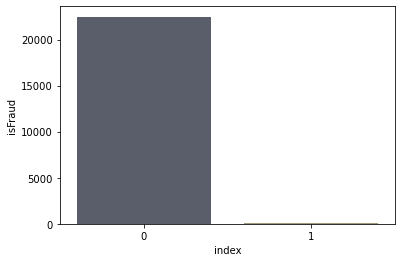

In [225]:
xx = df['isFraud'].value_counts().reset_index()
sns.barplot(x = "index", y = "isFraud", data=xx, palette = "cividis");

The above graph describes the imbalancing of the data.

In [226]:
from imblearn.over_sampling import SMOTE
col_names = list(df_features.columns)


X = df_features[col_names]
y = df_target['isFraud']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df.columns = col_names + ['isFraud']
df


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,3,9.839640e+03,1.701360e+05,160296.36,0.000000e+00,0.000000e+00,0,0
1,1,3,1.864280e+03,2.124900e+04,19384.72,0.000000e+00,0.000000e+00,0,0
2,1,4,1.810000e+02,1.810000e+02,0.00,0.000000e+00,0.000000e+00,0,1
3,1,1,1.810000e+02,1.810000e+02,0.00,2.118200e+04,0.000000e+00,0,1
4,1,3,1.166814e+04,4.155400e+04,29885.86,0.000000e+00,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...
44945,1,4,2.424539e+04,2.424539e+04,0.00,0.000000e+00,0.000000e+00,0,1
44946,5,2,1.200747e+05,1.200747e+05,0.00,0.000000e+00,5.094106e+04,0,1
44947,1,1,1.179383e+06,1.179383e+06,0.00,0.000000e+00,1.716068e+06,0,1
44948,2,1,1.262564e+06,9.866231e+05,0.00,1.217519e+06,8.507784e+06,0,1


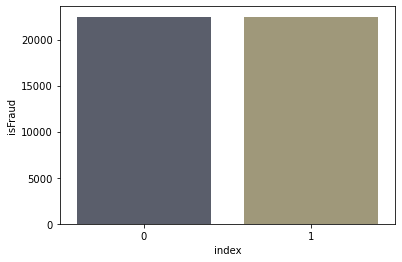

In [227]:
xx = df['isFraud'].value_counts().reset_index()
sns.barplot(x = "index", y = "isFraud", data=xx, palette = "cividis");

From the above graph, we conclude that the proper balancing of the given dataset.

<a id="Classification of Models"> </a>
## 7. Feature Selection 

**7.1 LOGISTIC_REGRESSION**

In [228]:
#Logistic Regression
#Assinging the x and y values for the dataset.
x = df.drop(['isFraud'], axis = 1)
y = df['isFraud']


In [229]:
# Splitting the dataset into the Training set and Test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [230]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [231]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [232]:
#prediction
y_pred=model.predict(x_test)

In [233]:
#predicting the occurances of  probabilitiess for the data
model.predict_proba(x_test)

array([[9.99995478e-01, 4.52217992e-06],
       [1.40820964e-01, 8.59179036e-01],
       [1.00000000e+00, 1.43398062e-21],
       ...,
       [9.63847332e-06, 9.99990362e-01],
       [1.00000000e+00, 4.40547238e-23],
       [7.18953778e-01, 2.81046222e-01]])

In [234]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8646556326748531

In [235]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[4740,  866],
       [ 655, 4977]], dtype=int64)

In [236]:
#Classification Report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      5606
           1       0.85      0.88      0.87      5632

    accuracy                           0.86     11238
   macro avg       0.87      0.86      0.86     11238
weighted avg       0.87      0.86      0.86     11238



In [237]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [238]:
#visualizing the ROC-AUC curve
y_proba=model.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[4.52217992e-06 8.59179036e-01 1.43398062e-21 ... 9.99990362e-01
 4.40547238e-23 2.81046222e-01]


In [239]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [240]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9185060763325821


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

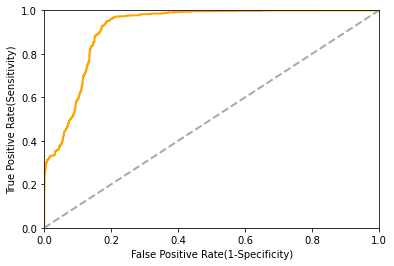

In [241]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [242]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_Regression = pd.Series({'Model': "Logistic_Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_Regression , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.864611,0.851788,0.8837,0.864656,0.867451


The above table shows the 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1 - score' are predicted for the Logistic_Regression.

**7.2 LOGISTICREGRESSION HYPERPARAMETER TUNING USING GRIDSEARCHCV**

In [243]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9272366387930268


In [244]:

# compiling the required information
GridSearchCV = pd.Series({'Model': "GridSearchCV",
                     'AUC Score' : "-",
                 'Precision Score': "-",
                 'Recall Score': "-",
                 'Accuracy Score': logreg_cv.best_score_,
                  'f1-score':"-"})



# appending our result table
result_tabulation = result_tabulation.append(GridSearchCV , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.864611,0.851788,0.8837,0.864656,0.867451
1,GridSearchCV,-,-,-,0.927237,-


GridSearchCV is used here only for the improvement of the accuracy_score 

**7.3 RANDOM_FOREST_CLASSIFIER**

In [245]:
#RandomForestClassifier 
x = df.drop(['isFraud'], axis = 1)
y = df['isFraud']

In [246]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [247]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [248]:
#fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [249]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [250]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.999110161950525

In [251]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[5597,    9],
       [   1, 5631]], dtype=int64)

In [252]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5606
           1       1.00      1.00      1.00      5632

    accuracy                           1.00     11238
   macro avg       1.00      1.00      1.00     11238
weighted avg       1.00      1.00      1.00     11238



In [253]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [254]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0. 1. 0. ... 1. 0. 0.]


In [255]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [256]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9998117853385579


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

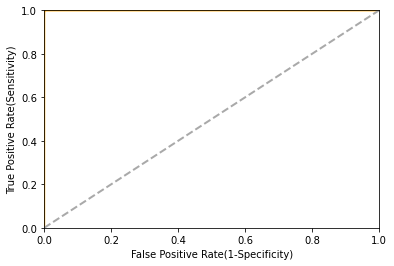

In [257]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [258]:

# compiling the required information
RandomForestClassifier = pd.Series({'Model': "RandomForestClassifier",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(RandomForestClassifier , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.864611,0.851788,0.8837,0.864656,0.867451
1,GridSearchCV,-,-,-,0.927237,-
2,RandomForestClassifier,0.999109,0.998404,0.999822,0.999110,0.999113


The above table shows the 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score', 'f1 - score' are predicted for the Logistic_Regression and Random_Forest_Classifier.

**7.4 Decision_Tree_Classifier**

In [259]:
#DecisionTreeClassifier
x = df.drop(['isFraud'], axis = 1)
y = df['isFraud']

In [260]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [261]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [262]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [263]:
#Fitting
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [264]:
#prediction
y_pred=model.predict(x_test)

In [265]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.997686421071365

In [266]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[5583,   23],
       [   3, 5629]], dtype=int64)

In [267]:
#Classification Report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5606
           1       1.00      1.00      1.00      5632

    accuracy                           1.00     11238
   macro avg       1.00      1.00      1.00     11238
weighted avg       1.00      1.00      1.00     11238



In [268]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [269]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0. 1. 0. ... 1. 0. 0.]


In [270]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [271]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9998117853385579


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

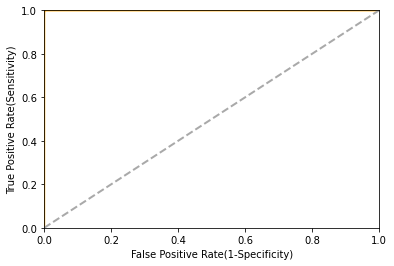

In [272]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [273]:

# compiling the required information
DecisionTreeClassifier = pd.Series({'Model': "DecisionTreeClassifier",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(DecisionTreeClassifier , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.864611,0.851788,0.8837,0.864656,0.867451
1,GridSearchCV,-,-,-,0.927237,-
2,RandomForestClassifier,0.999109,0.998404,0.999822,0.999110,0.999113
3,DecisionTreeClassifier,0.997682,0.995931,0.999467,0.997686,0.997696


The above table shows the 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1 - score' are predicted for the Logistic_Regression, Random_Forest_Classifier and Decision_Tree_Classifier.

<a id="model_cmp"> </a>
## 8. Model Comparision

In [274]:
# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_Regression,0.864611,0.851788,0.8837,0.864656,0.867451
1,GridSearchCV,-,-,-,0.927237,-
2,RandomForestClassifier,0.999109,0.998404,0.999822,0.999110,0.999113
3,DecisionTreeClassifier,0.997682,0.995931,0.999467,0.997686,0.997696


From the above results table, we conclude that **the accuracy score for the given dataset is more ,when using RandomForestClassifier and DecisionTreeClasifier** classification models.

In [275]:
pip install powerbiclient

<a id="Power BI"> </a>
## 9. Power BI

In [276]:
#import libraries
from powerbiclient import Report, models

In [277]:
# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code IZQV2PSSH to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [278]:
group_id="c022f164-e173-4892-850c-e67976ca07a1"
report_id="a36e8346-254c-42ad-80de-ed5ce1486e39"
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report

Report()